In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set width of the table
pd.set_option('display.width', 1000) # Total character width
pd.set_option('display.max_columns', None) # Show all columns

# Set random seed for reproducibility
np.random.seed(42)

# Generate 50 orders
num_orders = 50
products = ["Laptop", "Phone", "Tablet", "Monitor", "Keyboard", "Mouse"]
categories = ["Electronics", "Electronics", "Electronics", "Accessories", "Accessories", "Accessories"]
regions = ["North", "South", "East", "West"]

# Create DataFrame
data = {
    "OrderID": range(1001, 1001 + num_orders),
    "Date": [datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 90)) for _ in range(num_orders)],
    "Product": np.random.choice(products, num_orders),
    "Category": np.random.choice(categories, num_orders),
    "Price": np.round([np.random.uniform(50, 1500) for _ in range(num_orders)], 2),
    "Cost": np.round([np.random.uniform(30, 1000) for _ in range(num_orders)], 2),
    "Quantity": np.random.randint(1, 5, num_orders),
    "Region": np.random.choice(regions, num_orders)
}
df = pd.DataFrame(data)

# Calculate Metrics
df["Total_Sales"] = df["Price"] * df["Quantity"]
df["Total_Cost"] = df["Cost"] * df["Quantity"]
df["Profit"] = df["Total_Sales"] - df["Total_Cost"]
df["Profit_Margin"] = df["Profit"] / df["Total_Sales"] * 100

neg_profits = df[df['Profit'] < 0]
print(neg_profits[["Product", "Price", "Cost", "Quantity", "Profit"]])

In [ ]:
""" HANDLE NEGATIVE VALUE """

# if data is correct (Real Loss)

# Step1: Flag loss-making products
df["Is_Loss"] = df["Profit"] < 0

# Step2: Calculate how much we're losing
total_loss = df[df["Is_Loss"]]["Profit"].sum()
print(f"Total Loss: ${abs(total_loss):,.2f}")


# If Data is Incorrect

# Option 1
#df.loc[df["Product"] == "Mouse", "Cost"] = 100.00 # Example fixed cost

# Option 2
#df = df[df["Profit"] >= 0] 

Total Loss: $15,386.75


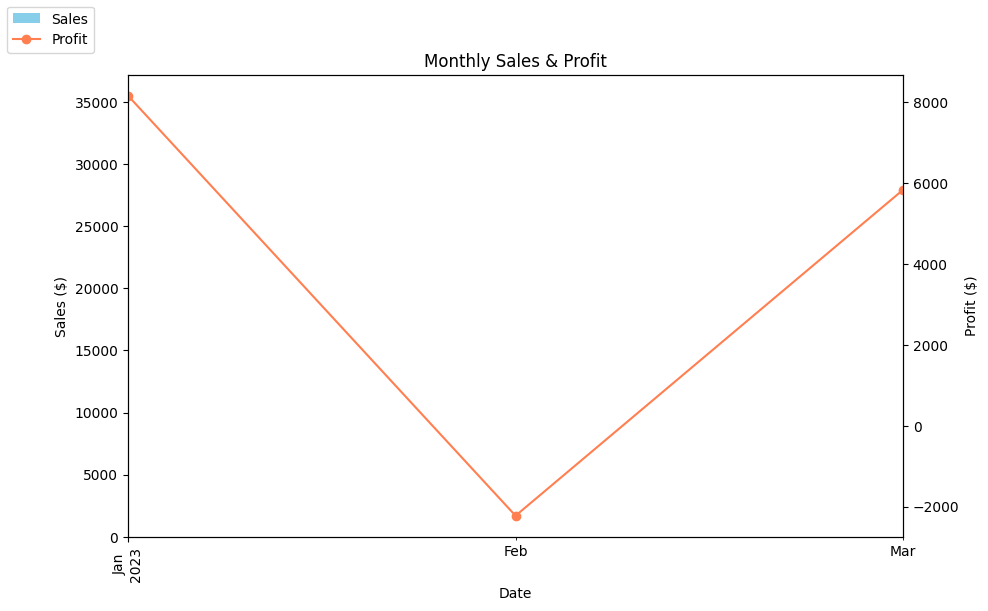

In [73]:
# Q1: Most Profitable Product
best_product = df.groupby("Product")["Profit"].sum().idxmax()
#print(f"Most Profitable Product: {best_product}")

# Q2: Regional Profit Margins
regional_margin = df.groupby("Region").agg({
    "Total_Sales": "sum",
    "Profit": "sum",
    "Profit_Margin": "mean"
}).round(2)
#print("\n Regional Profit Margin")
#print(regional_margin)

# Q3: Monthly Sales Trend
# Convert Date to datetime and set as index
df["Date"] = pd.to_datetime(df["Date"])

# Resample to monthly totals
monthly_sales = df.set_index("Date").resample('ME').agg({
    "Total_Sales": "sum",
    "Profit": "sum"
})



# Visualizations

# Linechart Monthly Trend
fig1 = px.line(
    monthly_sales.reset_index(),
    x="Date",
    y="Total_Sales",
    title="Monthly Sales Trend",
    labels={"Total_Sales": "Total Sales ($)"},
    markers=True
)
fig1.update_traces(line_color="#4C72B0", line_width=2)
fig1.update_layout(hovermode="x unified")
fig1.show()

# Interactive scatter plot (Sales vs Profit)
fig2 = px.scatter(
    df,
    x="Total_Sales",
    y="Profit",
    color="Product",
    size="Quantity",
    hover_data=["Region", "Date"],
    title="Sales vs Profit"
)
fig2.show()

# Animated monthly sales
fig3= px.bar(
    monthly_sales,
    x=monthly_sales.index,
    y="Total_Sales",
    animation_frame=monthly_sales.index.month_name(),
    title="Monthly Sales Growth"
)
fig3.show()

# Combined Charts (Matplotlib)
fig, ax1= plt.subplots(figsize=(10,6))

# Bar Chart - Monthly Sales
monthly_sales["Total_Sales"].plot(
    kind="bar",
    color="skyblue",
    ax=ax1,
    label="Sales"
)
ax1.set_ylabel("Sales ($)")

# Line Chart - Profit Margin
ax2 = ax1.twinx()
monthly_sales["Profit"].plot(
    kind="line",
    marker="o",
    color="coral",
    ax=ax2,
    label="Profit"
)
ax2.set_ylabel("Profit ($)")

plt.title("Monthly Sales & Profit")
fig.legend(loc="upper left")
plt.show()